# Import Statements

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, precision_score, roc_curve
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree._tree import TREE_LEAF
import random

# Data Pre-processing

## Data Loading

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv ('/content/drive/MyDrive/Assn1_Data/data_1.csv')
data.describe()

baseline value  accelerations  ...  histogram_tendency  fetal_health
count     1450.000000    1450.000000  ...         1450.000000   1450.000000
mean       133.457241       0.003301  ...            0.359310      1.206897
std         10.361641       0.003822  ...            0.587305      0.482925
min        112.000000       0.000000  ...           -1.000000      1.000000
25%        125.000000       0.000000  ...            0.000000      1.000000
50%        133.000000       0.002000  ...            0.000000      1.000000
75%        142.000000       0.006000  ...            1.000000      1.000000
max        159.000000       0.019000  ...            1.000000      3.000000

[8 rows x 22 columns]

## Removing null and duplicates

---





In [5]:
data.shape

(1450, 22)

In [6]:
data.isnull().count()

baseline value                                            1450
accelerations                                             1450
fetal_movement                                            1450
uterine_contractions                                      1450
light_decelerations                                       1450
severe_decelerations                                      1450
prolongued_decelerations                                  1450
abnormal_short_term_variability                           1450
mean_value_of_short_term_variability                      1450
percentage_of_time_with_abnormal_long_term_variability    1450
mean_value_of_long_term_variability                       1450
histogram_width                                           1450
histogram_min                                             1450
histogram_max                                             1450
histogram_number_of_peaks                                 1450
histogram_number_of_zeroes                             

In [7]:
data = data.drop_duplicates()

## Class Feature Split

In [8]:
x=data.drop(columns=['fetal_health']).astype(np.float32)
y=data['fetal_health']

## Normalisation

In [9]:
for column in list(x):
  x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())

## Data Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20, stratify=y)

# Evaluation Metrics

In [11]:
def TreeReport(y_test,y_pred):
  '''
  y_test: actual class labels
  y_pred: predicted class labels
  prints accuracy, recall and precision scores and plots AUC-ROC curve
  '''
  
  print("Accuracy: ", accuracy_score(y_test,y_pred))
  print("Recall Score: ", recall_score(y_test, y_pred,average="macro"))
  print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))

  fpr = {}
  tpr = {}
  n_class = len(y.unique())

  for i in range(n_class):    
      fpr[i], tpr[i], _  = roc_curve(y_test, y_pred, pos_label=i+1)

  plt.figure(figsize=(10, 6))
  plt.title("ROC plot")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.plot(fpr[0], tpr[0], marker='.',color='orange', label='Class 1 vs Rest')
  plt.plot(fpr[1], tpr[1], marker='.',color='green', label='Class 2 vs Rest')
  plt.plot(fpr[2], tpr[2], marker='.',color='blue', label='Class 3 vs Rest')
  plt.legend()
  plt.show()

# Ques A

## Q1

In [12]:
clf=DecisionTreeClassifier(random_state = 20)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

Accuracy:  0.9583333333333334
Recall Score:  0.9415966386554621
Precision Score:  0.8946770529049011


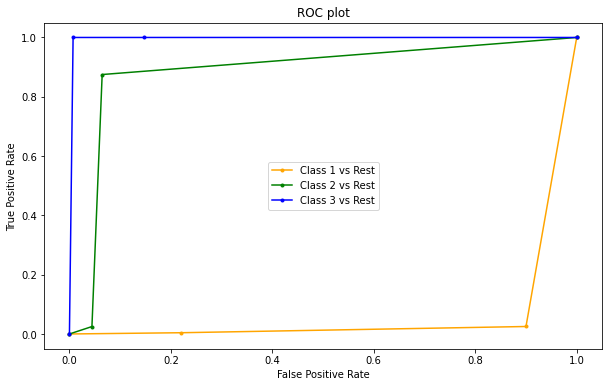

In [13]:
TreeReport(y_test,y_pred)

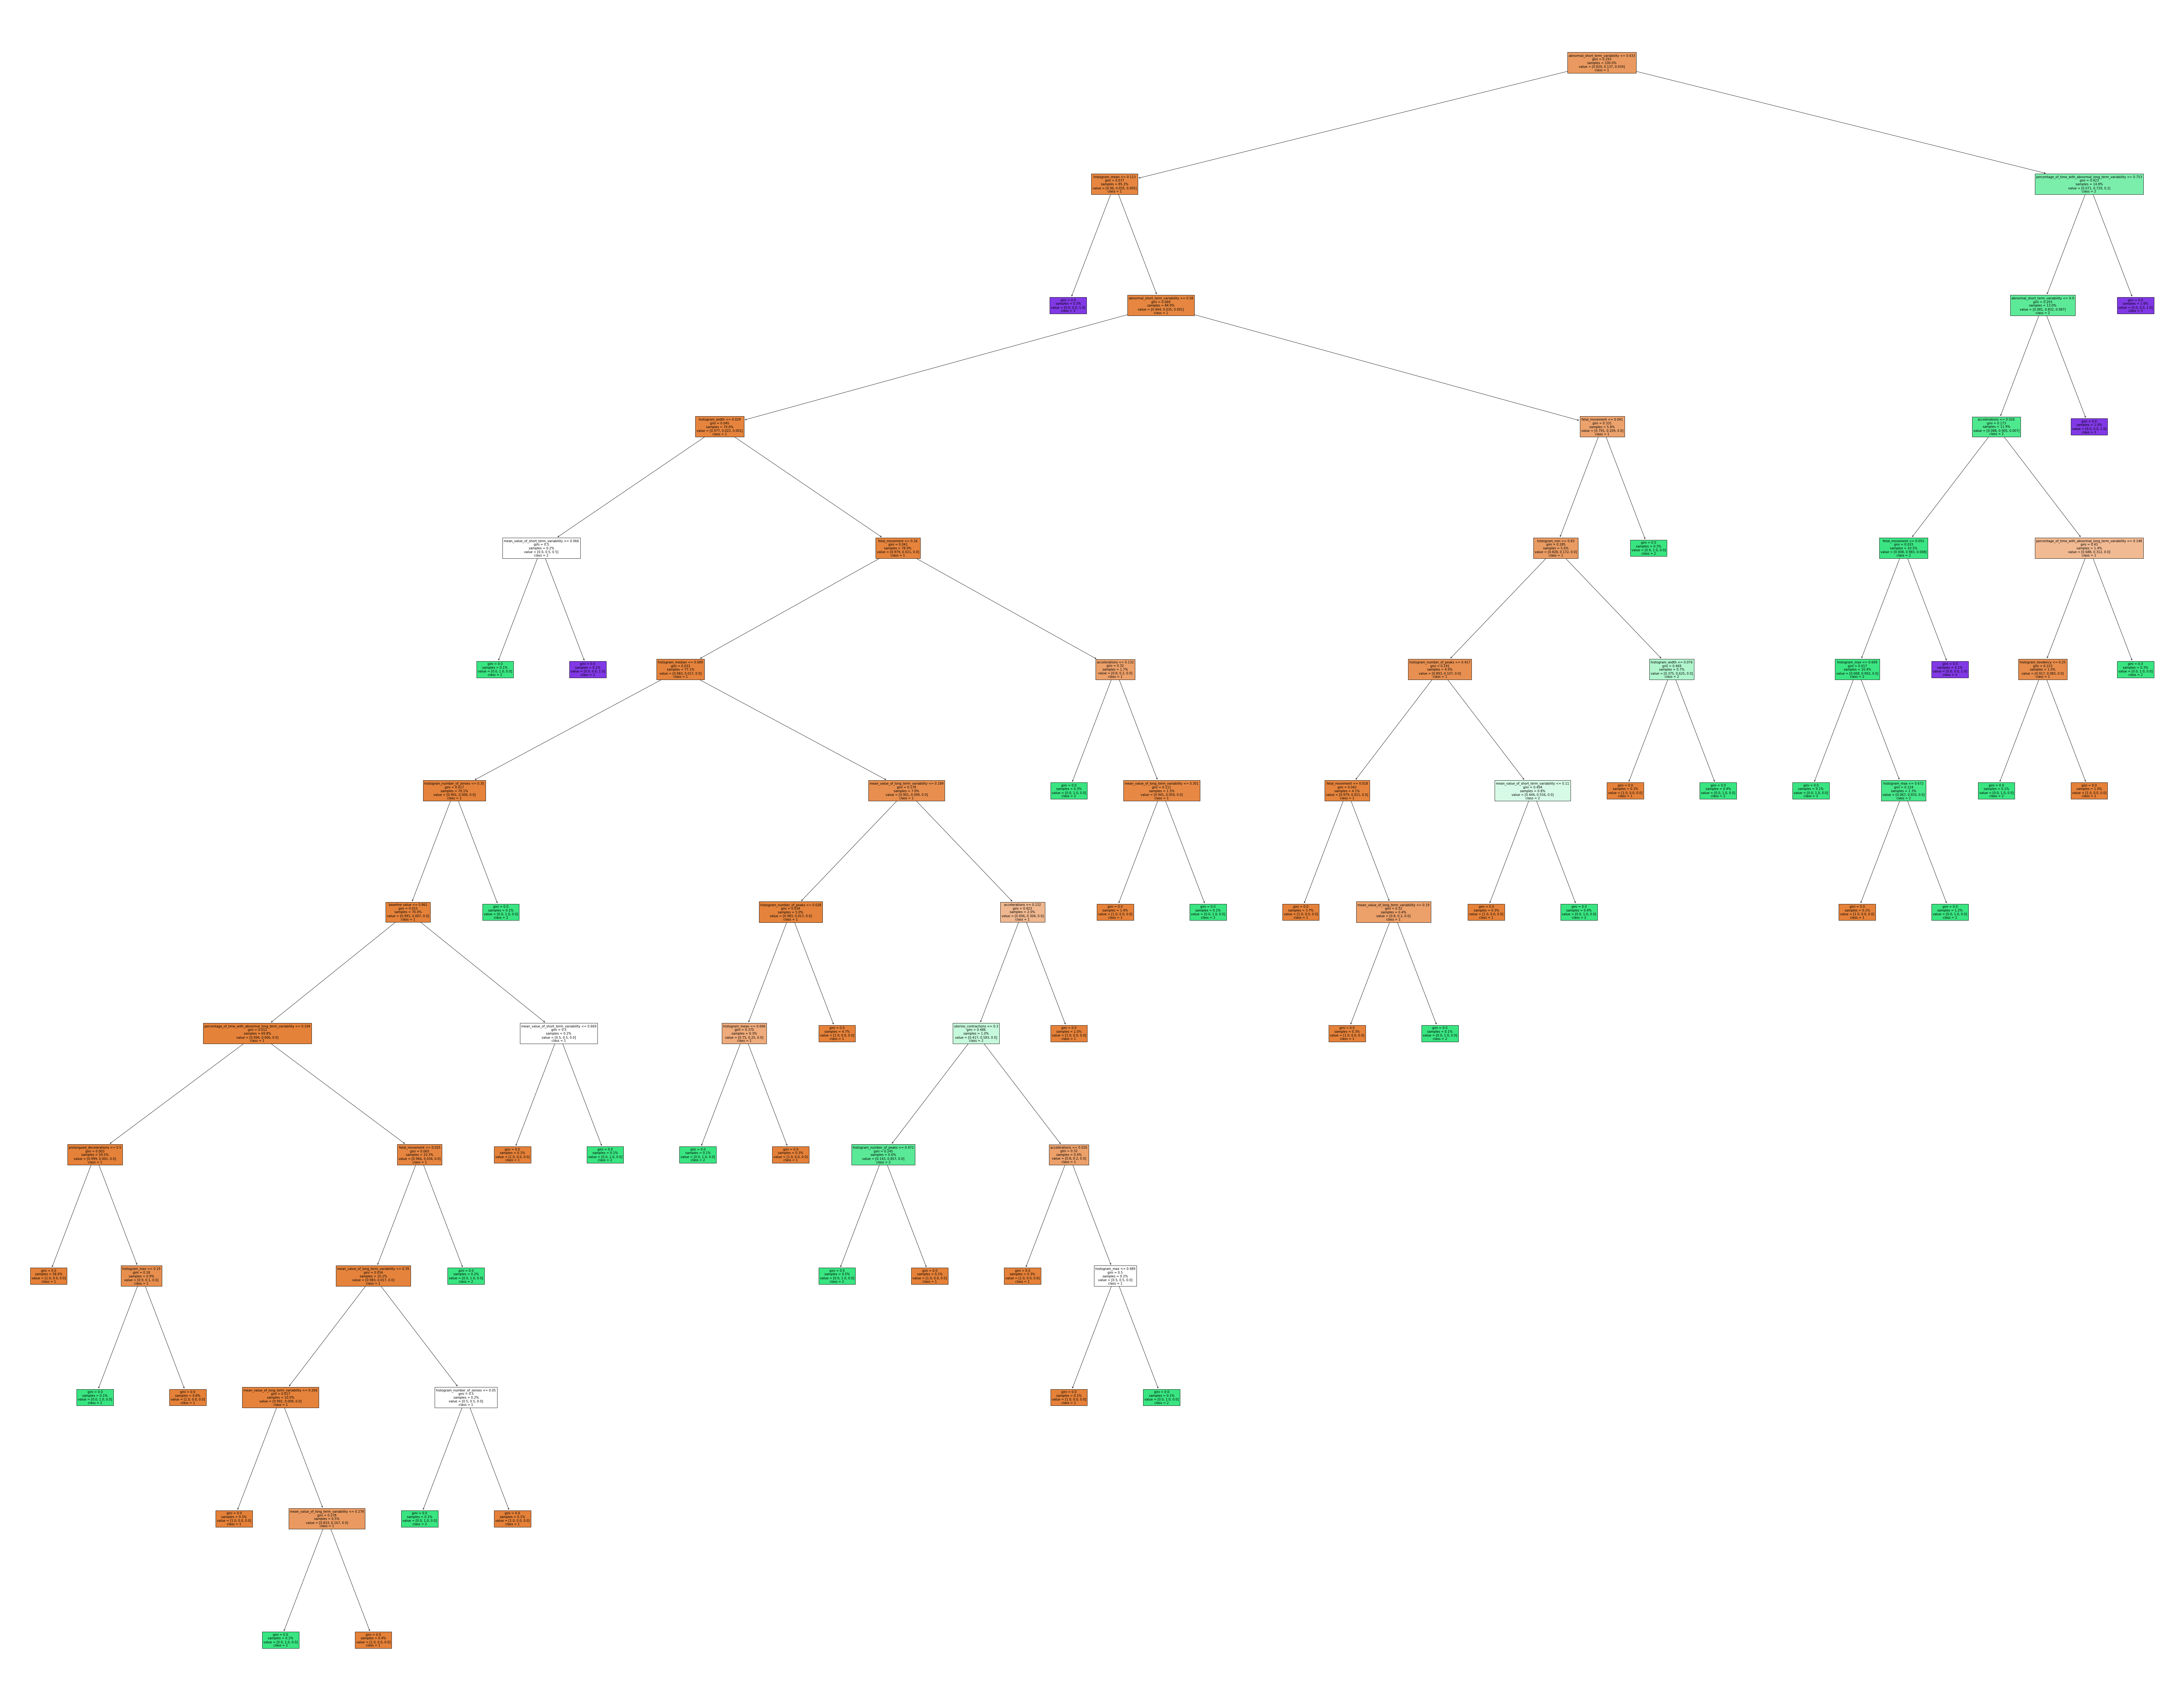

In [14]:
# Tree Visualisation
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(clf, feature_names=x.columns, class_names=np.unique(y).astype('str'), filled=True, proportion=True, fontsize=10)
plt.savefig('DT_A_1.pdf',dpi=300)

In [15]:
# Saving the visualisation
from google.colab import files
files.download("/content/DT_A_1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Q2

In [16]:
max_depth_range = list(range(1, 10))

depth_accuracy = []
for depth in max_depth_range: 
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 20)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    depth_accuracy.append(accuracy)

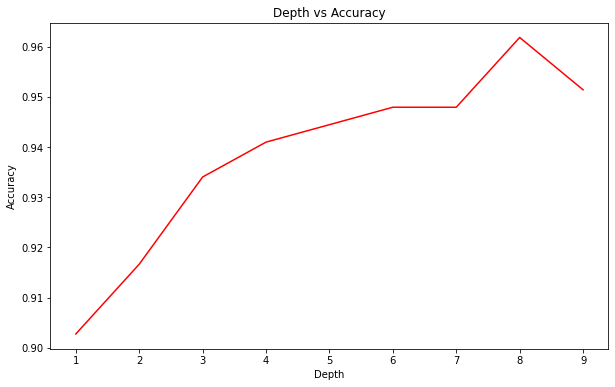

In [17]:
plt.figure(figsize=(10,6))
plt.plot(list(map(str, max_depth_range)), depth_accuracy, color='r')
plt.title("Depth vs Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

##Q3

### Criterion

Accuracy:  0.9548611111111112
Recall Score:  0.9263305322128851
Precision Score:  0.8976851851851851


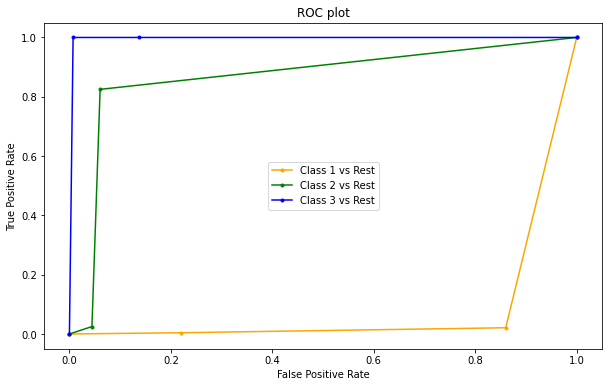

In [18]:
# default: gini
clf=DecisionTreeClassifier(criterion='entropy',random_state = 20)
clf.fit(x_train,y_train)
y_pred_entropy=clf.predict(x_test)
TreeReport(y_test,y_pred_entropy)

### Splitter

Accuracy:  0.9131944444444444
Recall Score:  0.8248599439775909
Precision Score:  0.801953075054341


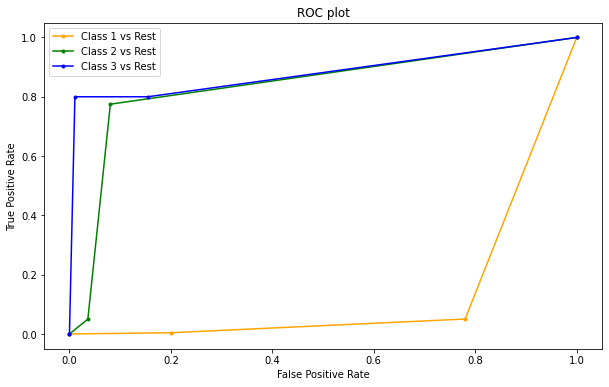

In [19]:
# default: best
clf=DecisionTreeClassifier(splitter='random',random_state = 20)
clf.fit(x_train,y_train)
y_pred_random=clf.predict(x_test)
TreeReport(y_test,y_pred_random)

### Min Samples Split

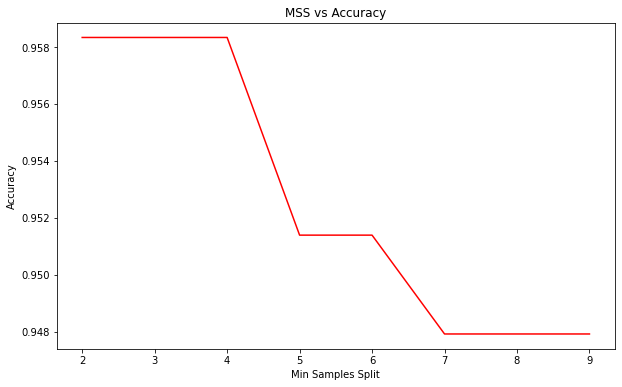

In [20]:
# default: 2
# mss -> min sample split
mss_range = list(range(2, 10))
mss_accuracy = []
for mss in mss_range: 
    clf=DecisionTreeClassifier(min_samples_split=mss,random_state = 20)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    mss_accuracy.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(list(map(str, mss_range)), mss_accuracy, color='r')
plt.title("MSS vs Accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.show()

Accuracy:  0.9583333333333334
Recall Score:  0.9415966386554621
Precision Score:  0.8946770529049011


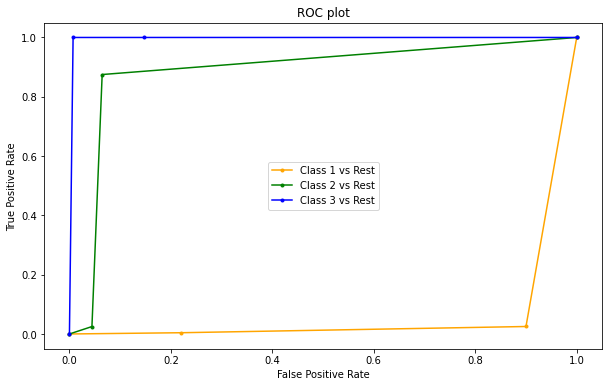

In [21]:
clf=DecisionTreeClassifier(min_samples_split=4,random_state = 20)
clf.fit(x_train,y_train)
y_pred_mss=clf.predict(x_test)
TreeReport(y_test,y_pred_mss)

### Max Depth

Accuracy:  0.9618055555555556
Recall Score:  0.9429971988795517
Precision Score:  0.9023539240257507


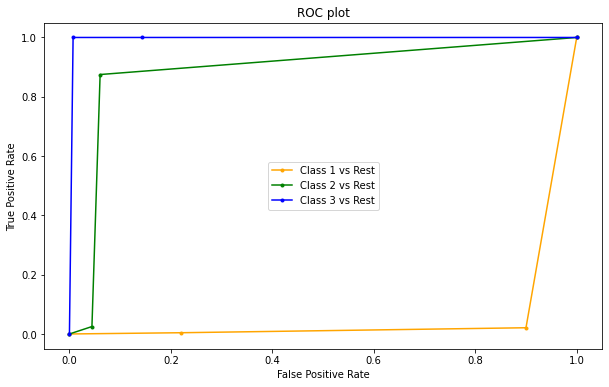

In [22]:
# default: None
# md -> max depth
clf=DecisionTreeClassifier(max_depth=8,random_state = 20)
clf.fit(x_train,y_train)
y_pred_md=clf.predict(x_test)
TreeReport(y_test,y_pred_md)

### Min Samples Leaf

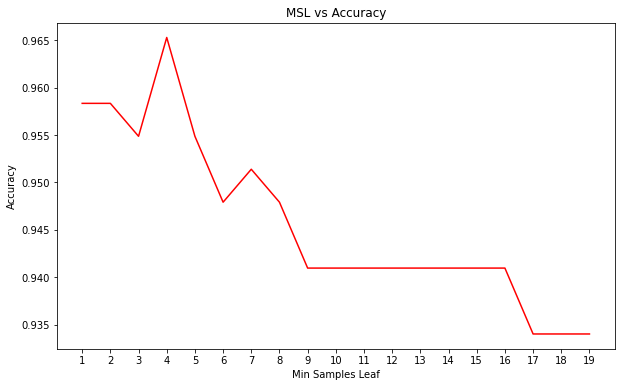

In [23]:
# default: 1
# msl -> min samples leaf
msl_range = list(range(1, 20))
msl_accuracy = []
for msl in msl_range: 
    clf=DecisionTreeClassifier(min_samples_leaf=msl,random_state = 20)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    msl_accuracy.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(list(map(str, msl_range)), msl_accuracy, color='r')
plt.title("MSL vs Accuracy")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

Accuracy:  0.9652777777777778
Recall Score:  0.9374649859943979
Precision Score:  0.9170980702101034


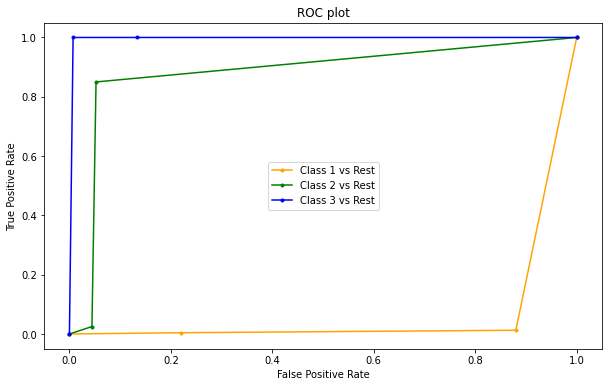

In [24]:
clf=DecisionTreeClassifier(min_samples_leaf = 4,random_state = 20)
clf.fit(x_train,y_train)
y_pred_msl=clf.predict(x_test)
TreeReport(y_test,y_pred_msl)

### Max features

Accuracy:  0.9270833333333334
Recall Score:  0.8581932773109244
Precision Score:  0.8305097451274364


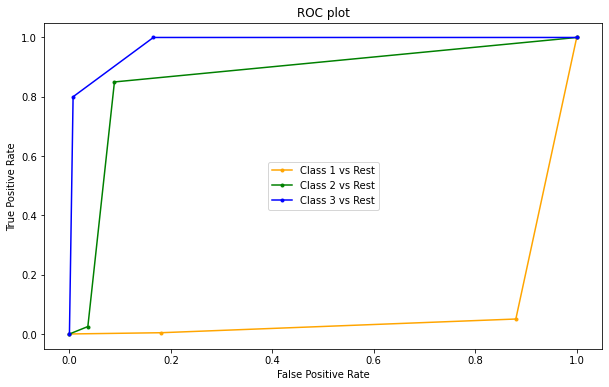

In [25]:
# default: None
# mf -> max features (log)
clf=DecisionTreeClassifier(max_features="log2",random_state = 20)
clf.fit(x_train,y_train)
y_pred_mf=clf.predict(x_test)
TreeReport(y_test,y_pred_mf)

Accuracy:  0.9270833333333334
Recall Score:  0.8581932773109244
Precision Score:  0.8305097451274364


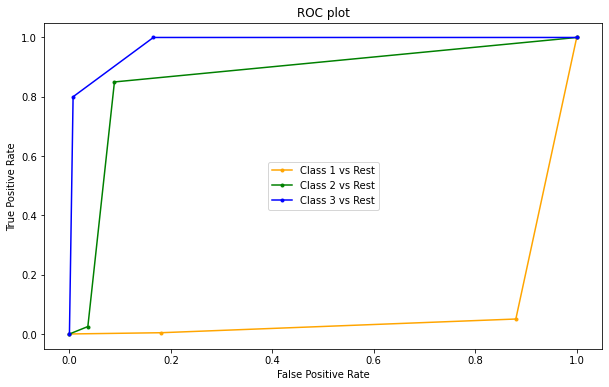

In [26]:
# default: None
# mf -> max features (sqrt)
clf=DecisionTreeClassifier(max_features="sqrt",random_state = 20)
clf.fit(x_train,y_train)
y_pred_mf=clf.predict(x_test)
TreeReport(y_test,y_pred_mf)

### Class Weight

Accuracy:  0.9652777777777778
Recall Score:  0.9443977591036413
Precision Score:  0.9104439167200674


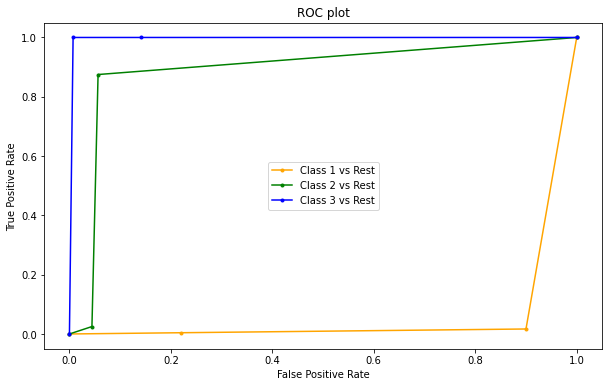

In [27]:
# default: None (weight 1 for each class)
# cw -> class weight 
clf=DecisionTreeClassifier(class_weight="balanced",random_state = 20)
clf.fit(x_train,y_train)
y_pred_cw=clf.predict(x_test) 
TreeReport(y_test,y_pred_cw)

### Max Leaf Nodes

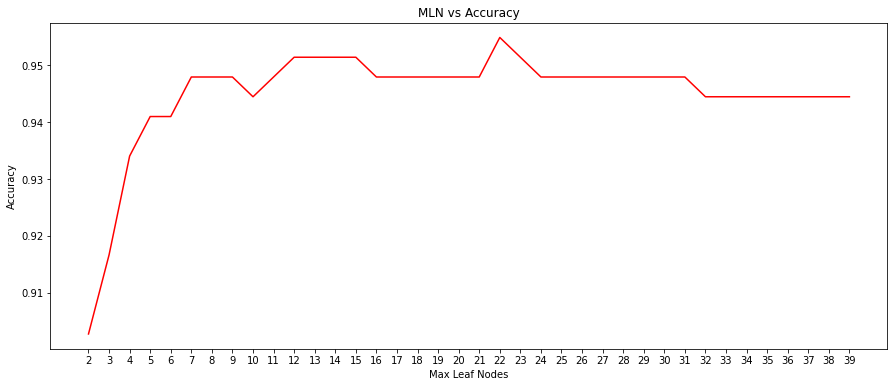

In [28]:
# default: None
# mln -> max leaf nodes
mln_range = list(range(2, 40))
mln_accuracy = []
for mln in mln_range: 
    clf=DecisionTreeClassifier(max_leaf_nodes=mln,random_state = 20)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    mln_accuracy.append(accuracy)

plt.figure(figsize=(15,6))
plt.plot(list(map(str, mln_range)), mln_accuracy, color='r')
plt.title("MLN vs Accuracy")
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.show()

Accuracy:  0.9548611111111112
Recall Score:  0.9263305322128851
Precision Score:  0.8976851851851851


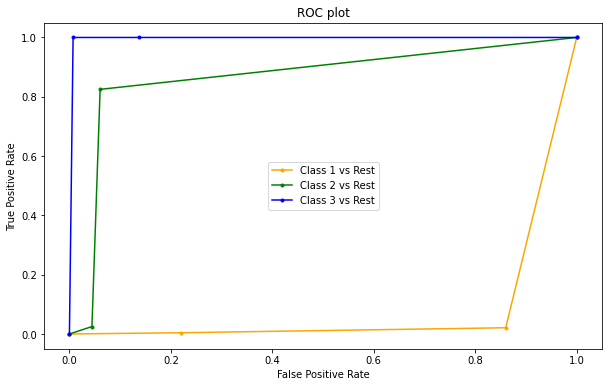

In [29]:
clf=DecisionTreeClassifier(max_leaf_nodes = 22,random_state = 20)
clf.fit(x_train,y_train)
y_pred_mln=clf.predict(x_test)
TreeReport(y_test,y_pred_mln)

# DT-A

Training Set:
Accuracy:  0.9826086956521739
Recall Score:  0.9554908913231067
Precision Score:  0.9802355664488017


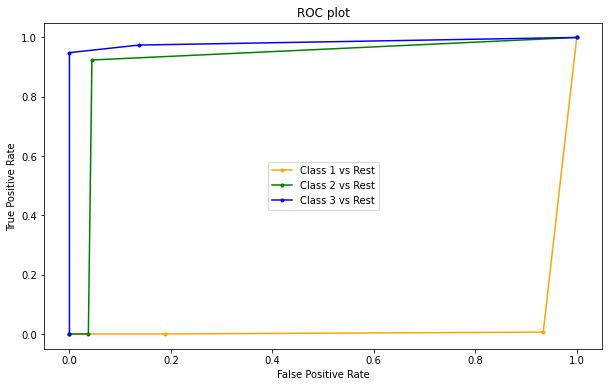

Testing Set:
Accuracy:  0.9652777777777778
Recall Score:  0.9374649859943979
Precision Score:  0.9170980702101034


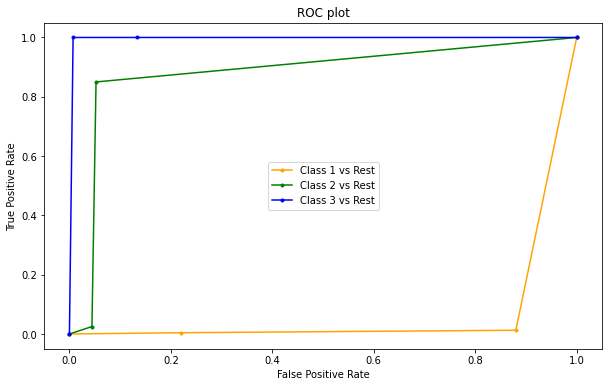

In [80]:
DT_A=DecisionTreeClassifier(min_samples_leaf=4, random_state = 20)
DT_A.fit(x_train,y_train)

print("Training Set:")
TreeReport(y_train, DT_A.predict(x_train))

print("Testing Set:")
TreeReport(y_test,DT_A.predict(x_test))

# Ques B

## Q1

In [31]:
# Deep copying DT_A
DT_B_1 = clone(DT_A)
DT_B_1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [32]:
def remove_node(inner_tree, remove_id):
  '''
  inner_tree: DT structure
  remove_id: id of the removed node

  removes the existing node and duplicates the parent node in its place
  '''
  # tree variables initialisation
  children_left = inner_tree.children_left
  children_right = inner_tree.children_right
  variables = [inner_tree.feature, 
              inner_tree.threshold,
              inner_tree.value,
              inner_tree.n_node_samples,
              inner_tree.impurity,
              inner_tree.n_node_samples,
              inner_tree.weighted_n_node_samples]

  traversal_stack = [0]
  while len(traversal_stack) > 0:
    node_id = traversal_stack.pop()

    # if left child id == remove id
    if children_left[node_id] == remove_id:
      for variable in variables:
        variable[children_left[node_id]] = variable[node_id]
      break

    # if right child id == remove id
    if children_right[node_id] == remove_id:
      for variable in variables:
        variable[children_right[node_id]] = variable[node_id]
      break

    # BFS traversal stacking
    if children_left[node_id] != TREE_LEAF:
        traversal_stack.append(children_left[node_id])
    if children_right[node_id] != TREE_LEAF:
        traversal_stack.append(children_right[node_id])

In [33]:
# Picking a random node to remove
n_nodes = DT_B_1.tree_.node_count
random.seed(20)
remove_id = random.randint(1, n_nodes)
remove_id

20

In [34]:
remove_node(DT_B_1.tree_, remove_id)

Accuracy:  0.9652777777777778
Recall Score:  0.9374649859943979
Precision Score:  0.9170980702101034


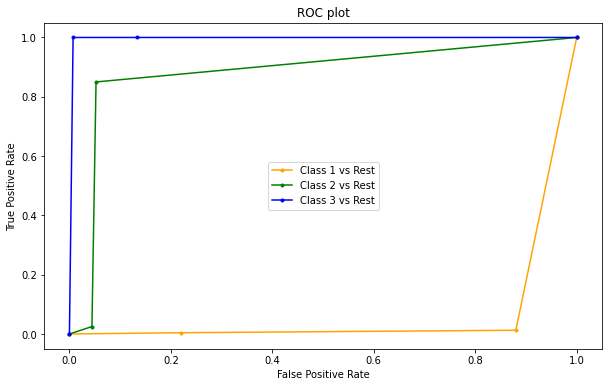

In [35]:
y_pred = DT_B_1.predict(x_test)
TreeReport(y_test,y_pred)

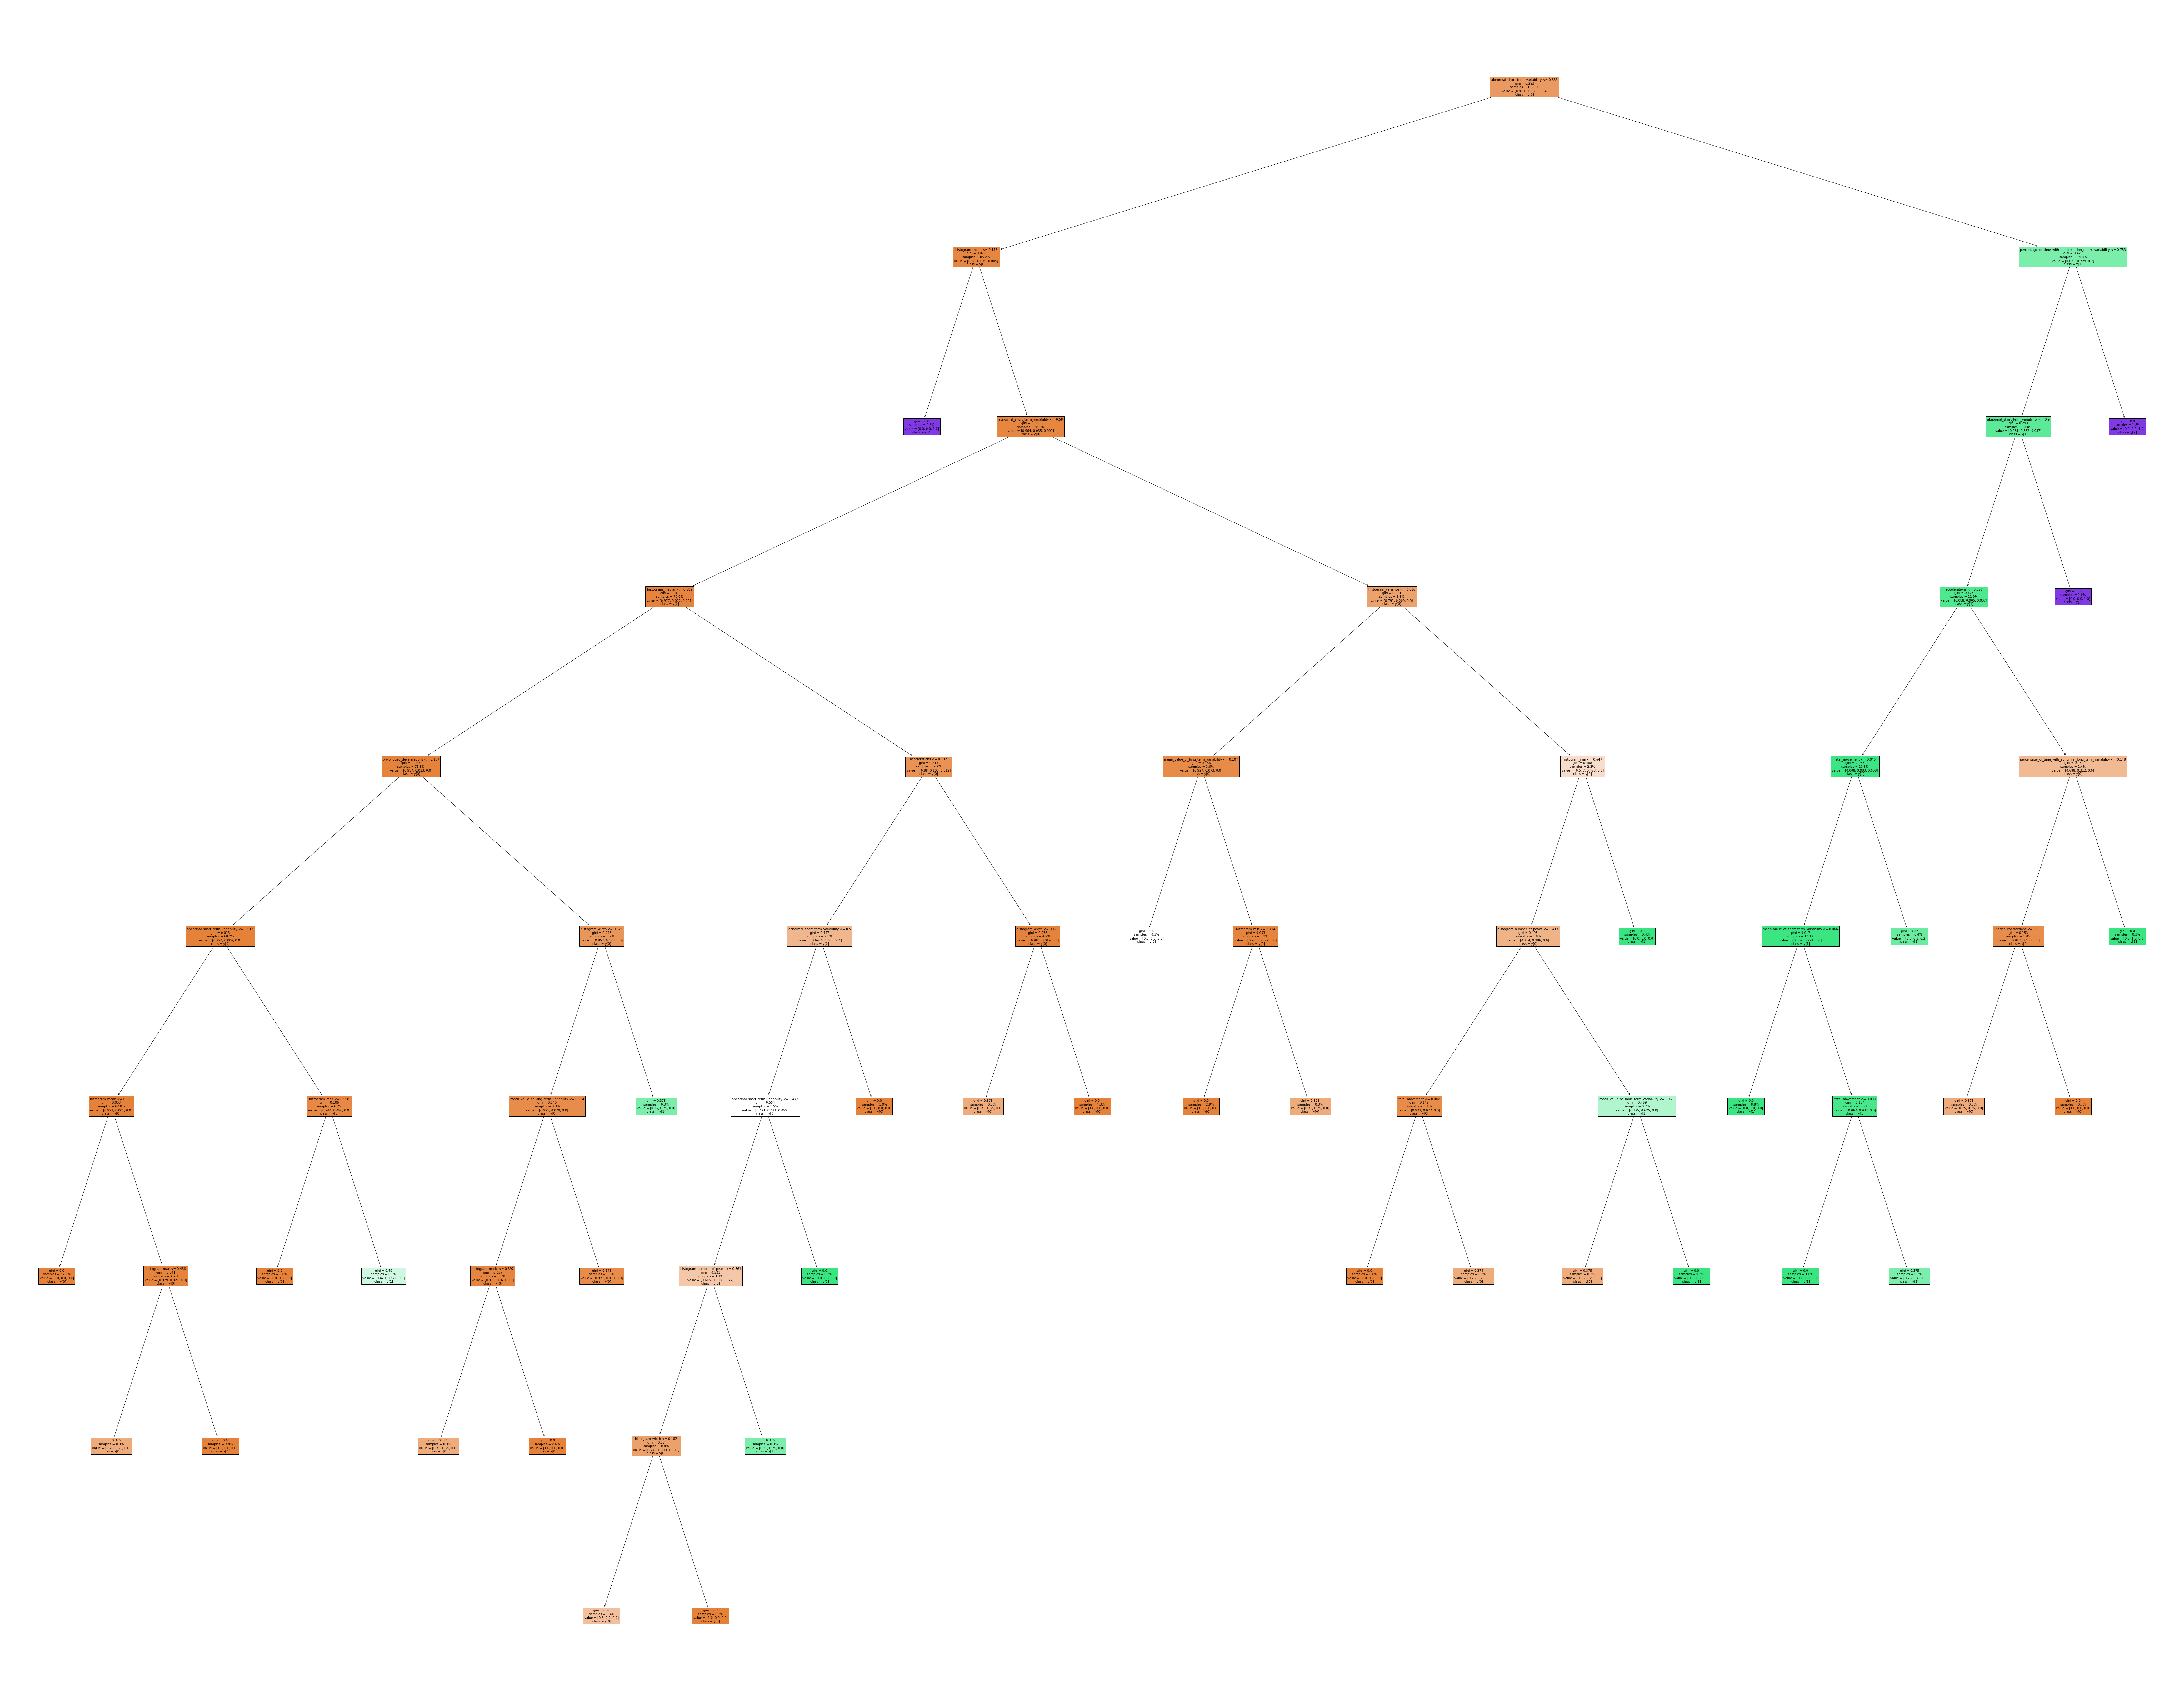

In [36]:
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(DT_B_1, feature_names=x.columns, class_names=True, filled=True, proportion=True, fontsize=10)
plt.savefig('DT_B_1.pdf',dpi=300)

In [37]:
# Saving the visualisation
from google.colab import files
files.download("/content/DT_B_1.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Q2

### Cost Complexity Post-Pruning

In [38]:
path = DT_A.cost_complexity_pruning_path(x_train, y_train)
alpha_arr = path['ccp_alphas']
alpha_arr

array([0.        , 0.0002099 , 0.00021617, 0.00028986, 0.000301  ,
       0.0003197 , 0.00038363, 0.00038778, 0.00040258, 0.00046377,
       0.00137838, 0.00140437, 0.00168339, 0.00195652, 0.00196107,
       0.00206282, 0.00229786, 0.00231651, 0.0025872 , 0.00348559,
       0.00377084, 0.00438406, 0.00668124, 0.01120227, 0.01738841,
       0.02452277, 0.16528163])

In [39]:
ccpp = DT_A.get_params()
for key in ccpp:
  ccpp[key] = [ccpp[key]]
ccpp['ccp_alpha'] = alpha_arr[1:]

best_para = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=ccpp)
_ = best_para.fit(x_train,y_train)

In [40]:
DT_B_2_CC = best_para.best_estimator_
DT_B_2_CC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004384057971014493, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=20, splitter='best')

Training Set:
Accuracy:  0.9634782608695652
Recall Score:  0.9002777292455457
Precision Score:  0.981049497911668


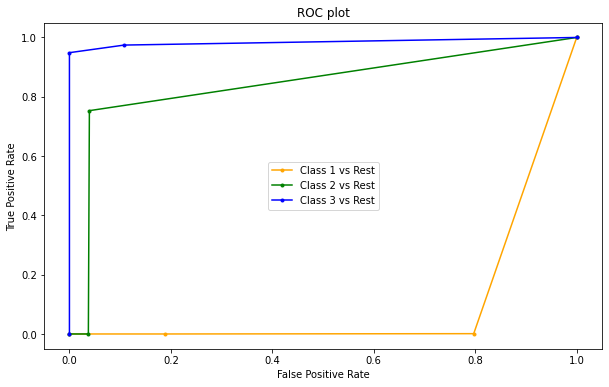

Testing Set:
Accuracy:  0.9409722222222222
Recall Score:  0.8721988795518207
Precision Score:  0.912957264957265


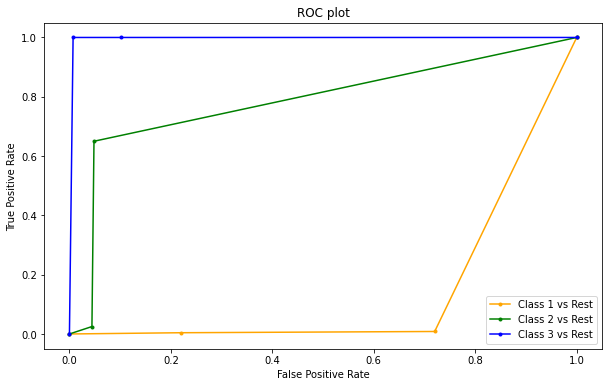

In [41]:
y_pred_train = DT_B_2_CC.predict(x_train)
y_pred_test = DT_B_2_CC.predict(x_test)
    
print("Training Set:")
TreeReport(y_train,y_pred_train)

print("Testing Set:")
TreeReport(y_test,y_pred_test)

In [42]:
DT_B_2_CC

DecisionTreeClassifier(ccp_alpha=0.004384057971014493, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=20, splitter='best')

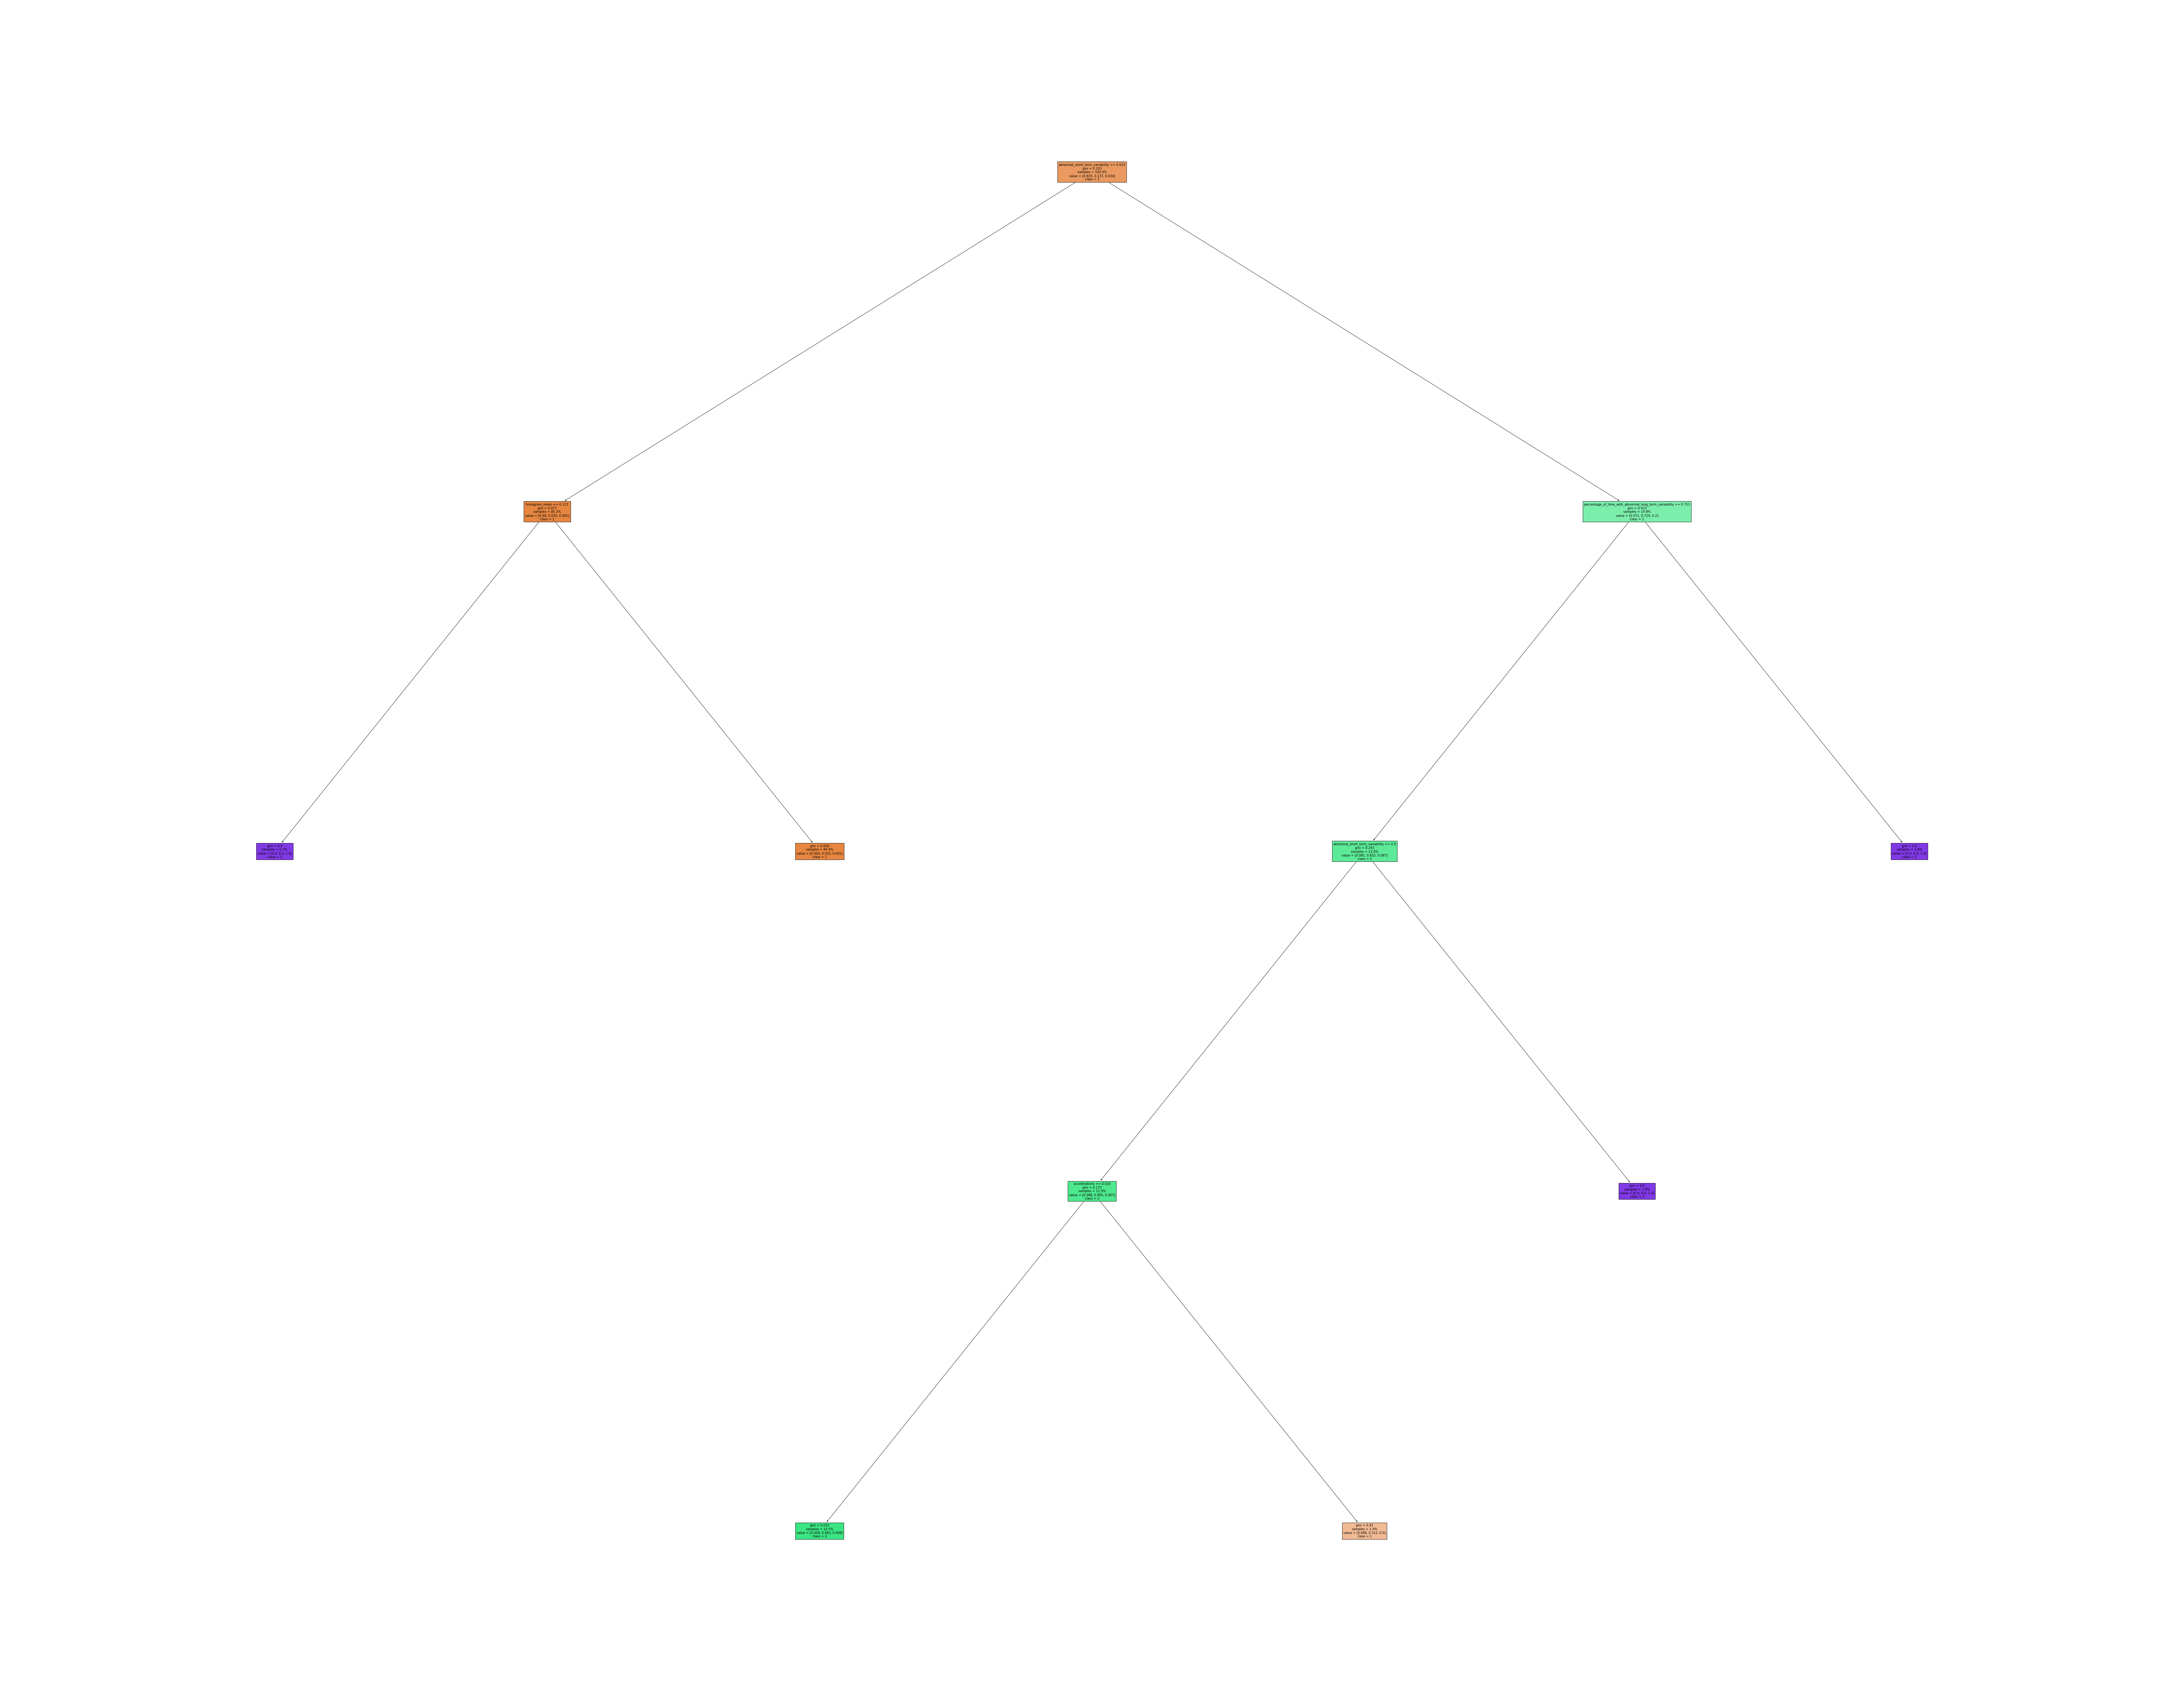

In [43]:
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(DT_B_2_CC, feature_names=x.columns, class_names=np.unique(y).astype('str'), filled=True, proportion=True, fontsize=10)
plt.savefig('DT_B_2_CC.pdf',dpi=300)

In [44]:
from google.colab import files
files.download("/content/DT_B_2_CC.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Pre-pruning

In [45]:
ppp = DT_A.get_params()
for key in ppp:
  ppp[key] = [ppp[key]]
ppp['min_samples_split'] = list(range(3, 6))
ppp['max_depth'] = list(range(7, 10))
ppp['max_leaf_nodes'] = list(range(30, 40))
ppp['max_features'] = ["sqrt","log2"]

best_para = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=ppp)
_ = best_para.fit(x_train,y_train)

In [46]:
DT_B_2_XX = best_para.best_estimator_
DT_B_2_XX.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=38,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

Training Set:
Accuracy:  0.9521739130434783
Recall Score:  0.8407123895920102
Precision Score:  0.8947047194885624


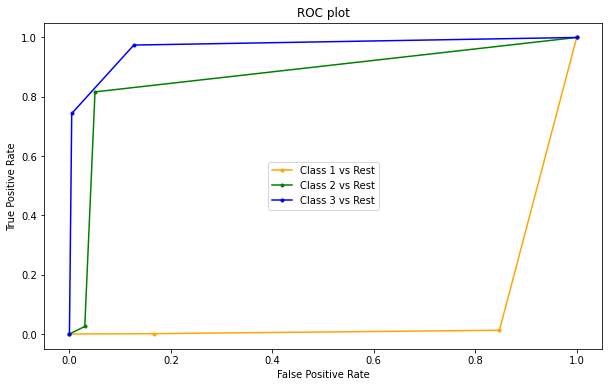

Testing Set:
Accuracy:  0.9305555555555556
Recall Score:  0.7360644257703081
Precision Score:  0.8697577276524645


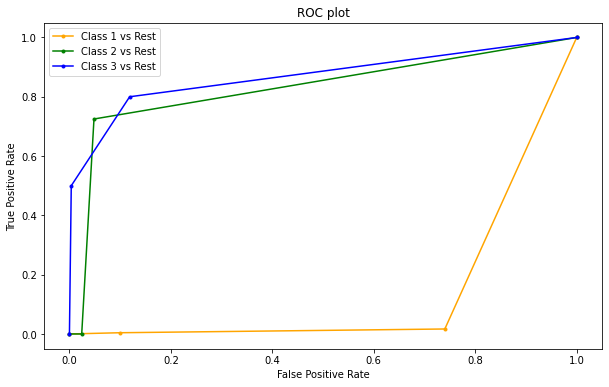

In [47]:
y_train_pred=DT_B_2_XX.predict(x_train)
y_test_pred = DT_B_2_XX.predict(x_test)

print("Training Set:")
TreeReport(y_train,y_train_pred)

print("Testing Set:")
TreeReport(y_test,y_test_pred)

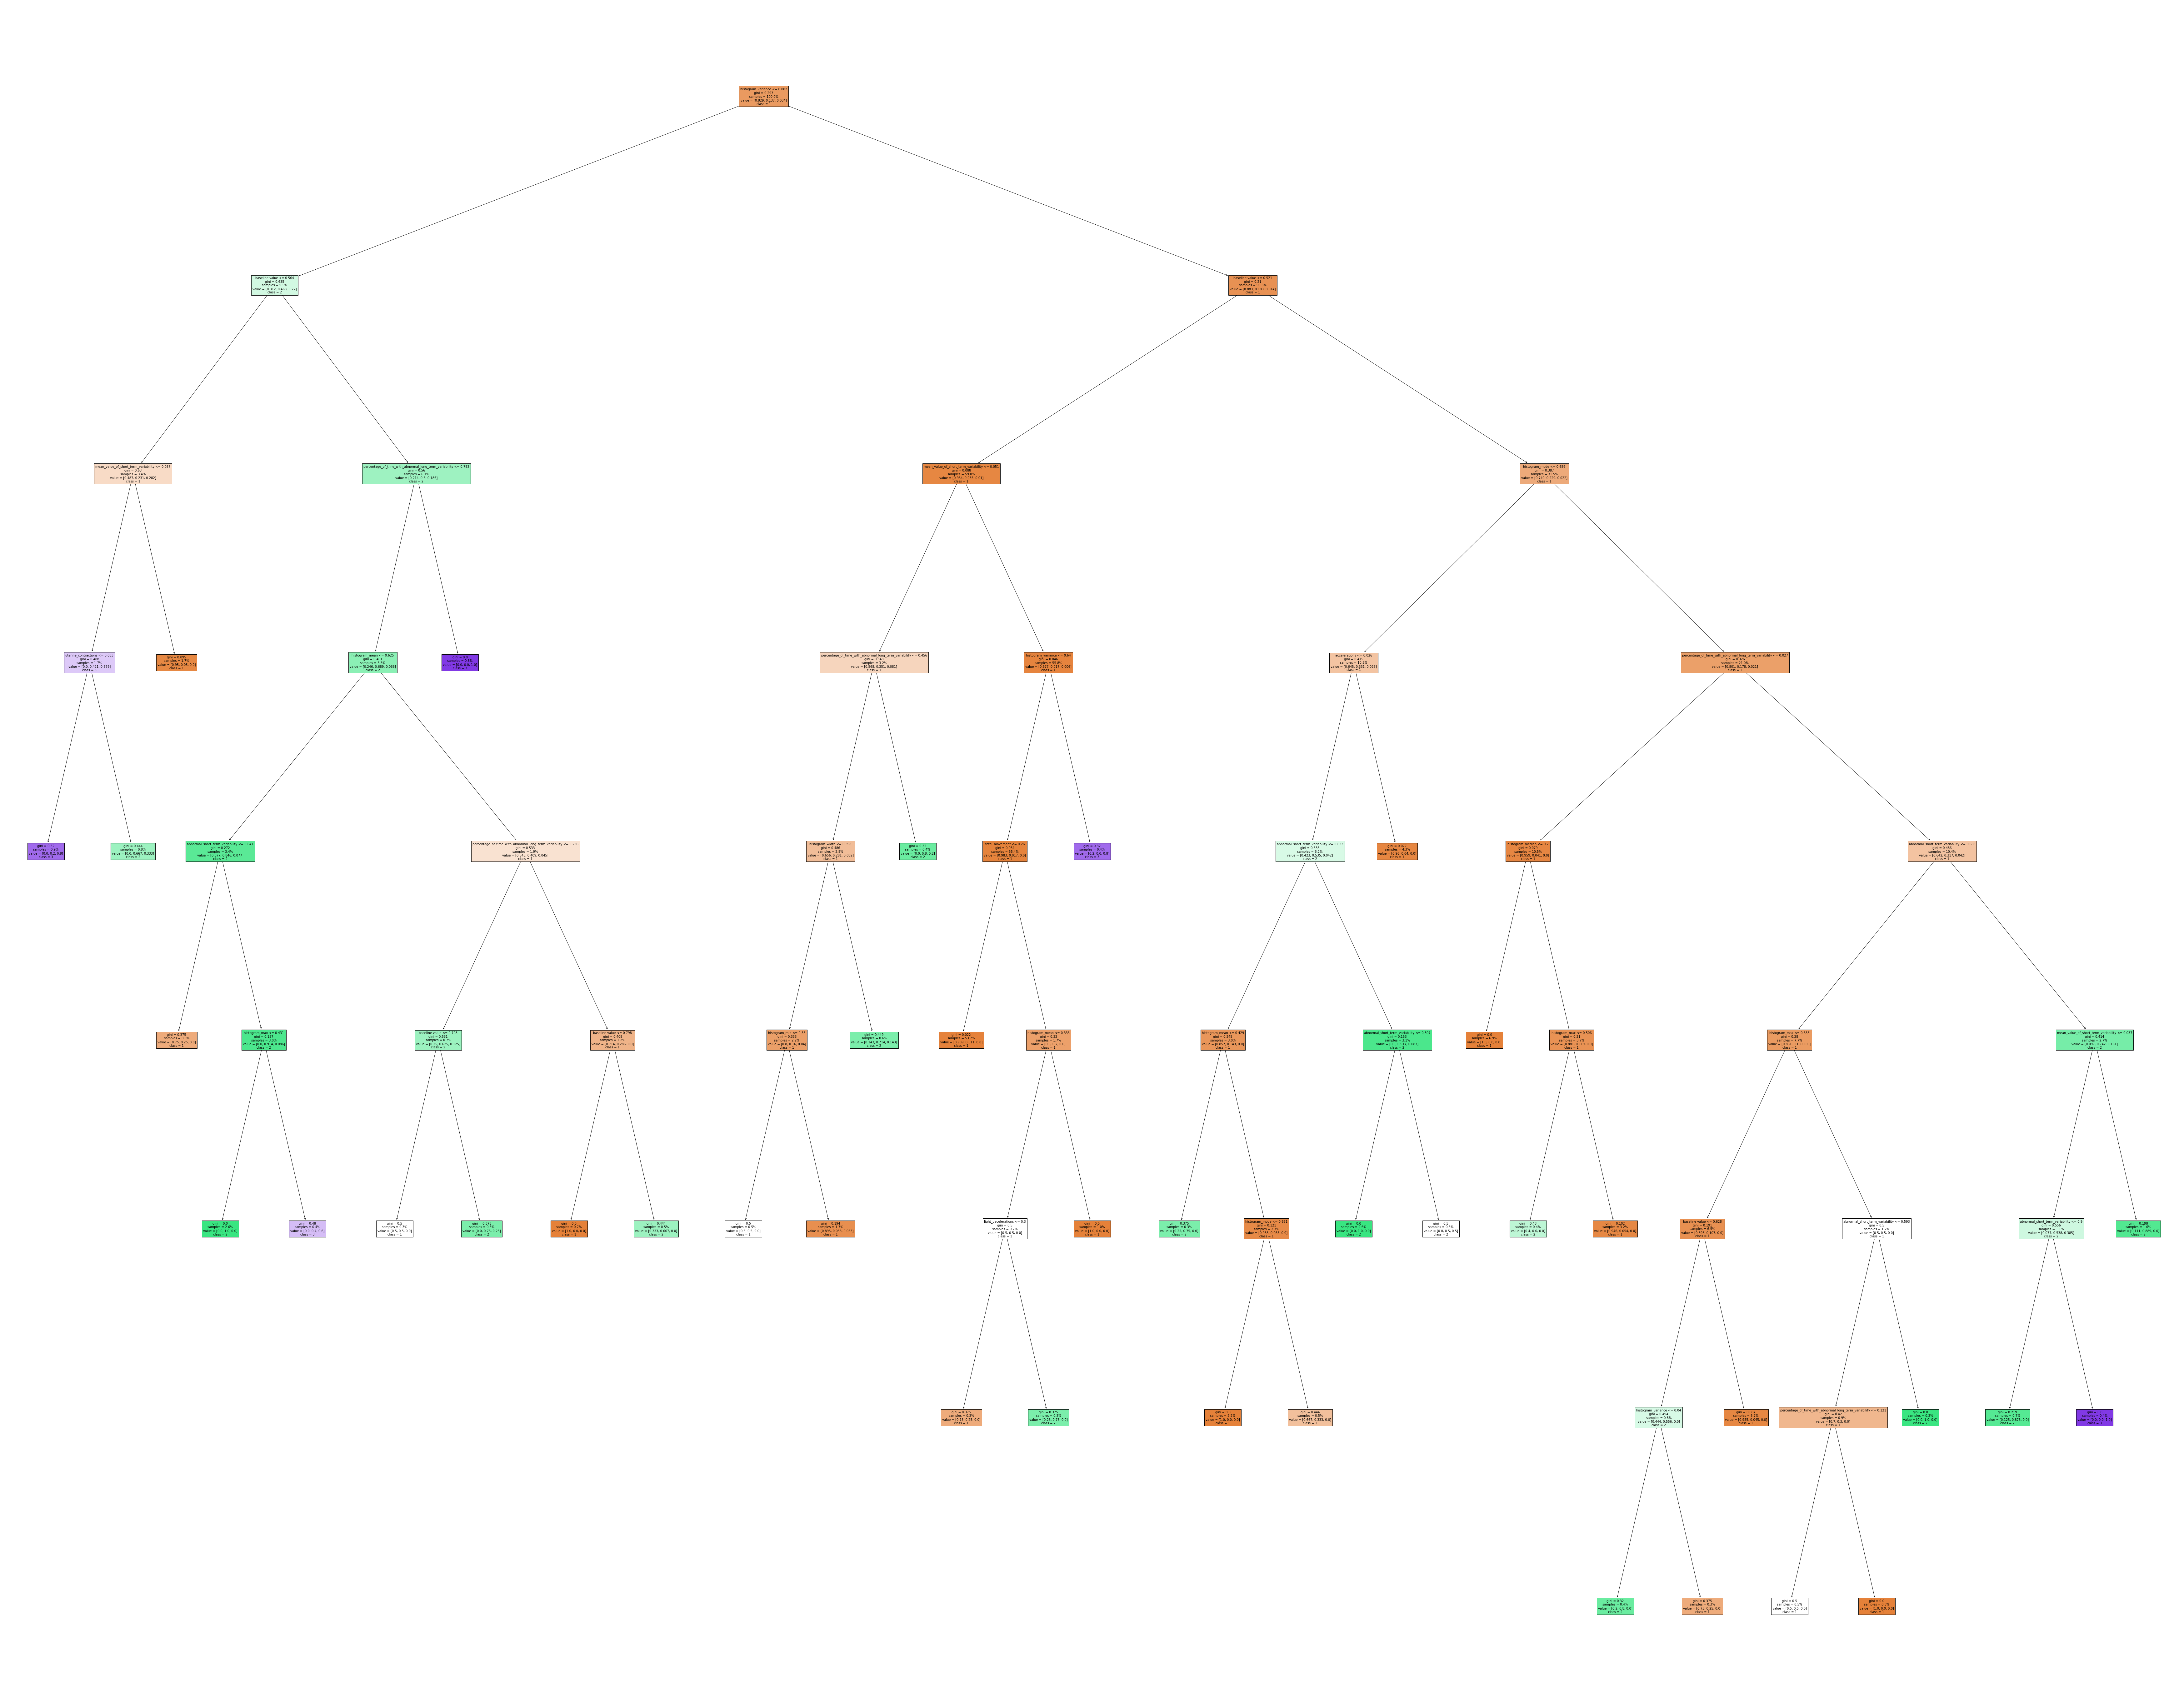

In [48]:
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(DT_B_2_XX, feature_names=x.columns, class_names=np.unique(y).astype('str'), filled=True, proportion=True, fontsize=10)
plt.savefig('DT_B_2_XX.pdf',dpi=300)

In [49]:
from google.colab import files
files.download("/content/DT_B_2_XX.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Q3

In [81]:
# finding costs corresponding to each node (if they are leaf nodes)
n_nodes = DT_A.tree_.node_count
children_left = DT_A.tree_.children_left
children_right = DT_A.tree_.children_right
value = DT_A.tree_.value

leaf_err_cost = np.zeros(shape=n_nodes, dtype=np.int64)

for idx in range(len(x_train)):
  y_actual = y_train.iloc[idx]

  traversal_stack = [0]
  while len(traversal_stack) > 0:
    node_id = traversal_stack.pop()
    
    y_pred = (value[node_id][0].tolist().index((max(value[node_id][0])))) + 1

    if y_pred != y_actual:
      leaf_err_cost[node_id] += 1

    if children_left[node_id] != TREE_LEAF:
       traversal_stack.append(children_left[node_id])
    if children_right[node_id] != TREE_LEAF:
        traversal_stack.append(children_right[node_id])

In [82]:
# full pruning
node_cost = 1 # whether it's a leaf or internal node
leaf_class_cost = math.ceil(math.log2(len(np.unique(y)))) # what's the class label of leaf
training_cost = math.ceil(math.log2(len(x_train)))  # encoding training set
atrribute_cost = math.ceil(math.log2(len(x_train.iloc[0]))) # which attribute to choose to split
test_cost = 1 # spliting criterion

def full_pruning(inner_tree, index):
  cost_leaf = 0
  cost_both = 0
  
  if inner_tree.children_left[index] == TREE_LEAF:
    cost_leaf = node_cost + leaf_class_cost + training_cost * leaf_err_cost[index]
    cost_both = node_cost + leaf_class_cost + training_cost * leaf_err_cost[index]

  else:
    cost_leaf = node_cost + leaf_class_cost + training_cost * leaf_err_cost[index]

    left_cost = full_pruning(inner_tree, inner_tree.children_left[index])
    right_cost = full_pruning(inner_tree, inner_tree.children_right[index])
    cost_both = node_cost + test_cost + atrribute_cost + left_cost + right_cost
  
  if cost_leaf < cost_both:
    
    inner_tree.children_left[index] = TREE_LEAF
    inner_tree.children_right[index] = TREE_LEAF
    return cost_leaf

  return cost_both 

In [89]:
DT_B3 = DT_A
_ = full_pruning(DT_B3.tree_, 0)

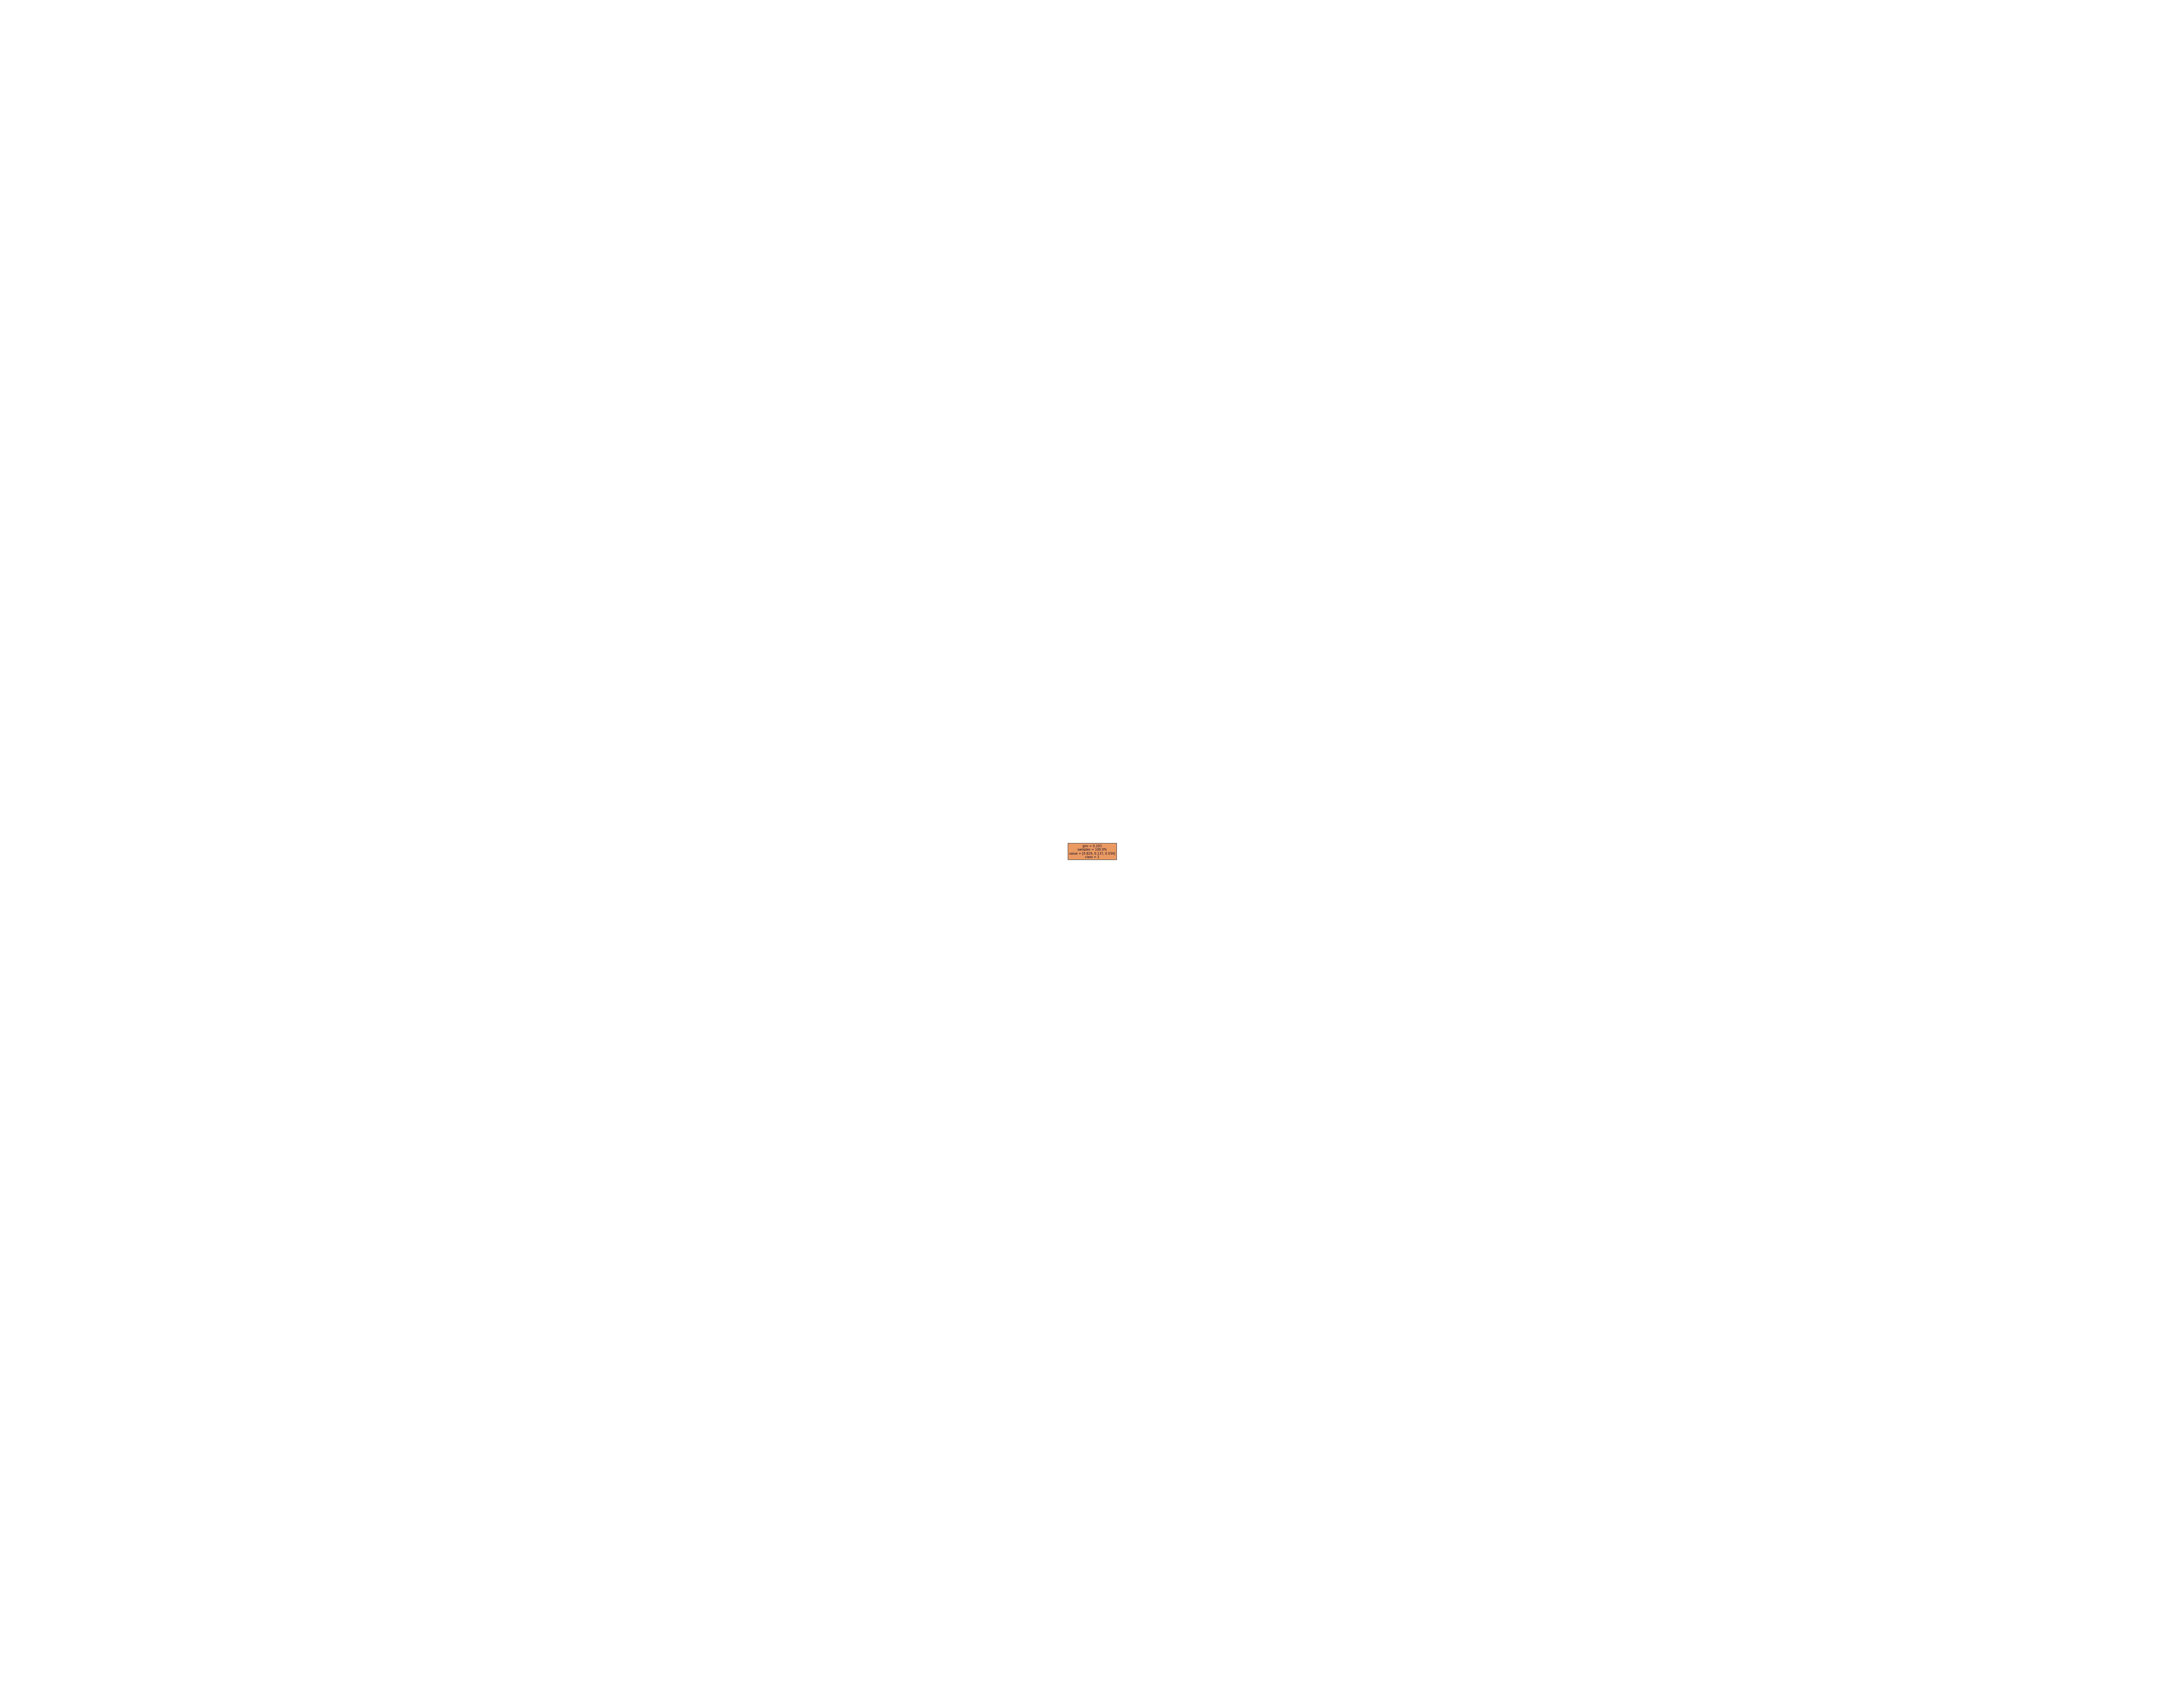

In [90]:
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(DT_B3, feature_names=x.columns, class_names=np.unique(y).astype('str'), filled=True, proportion=True, fontsize=10)
plt.savefig('DT_B3.pdf',dpi=300)

Training Set:
Accuracy:  0.828695652173913
Recall Score:  0.3333333333333333
Precision Score:  0.276231884057971


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


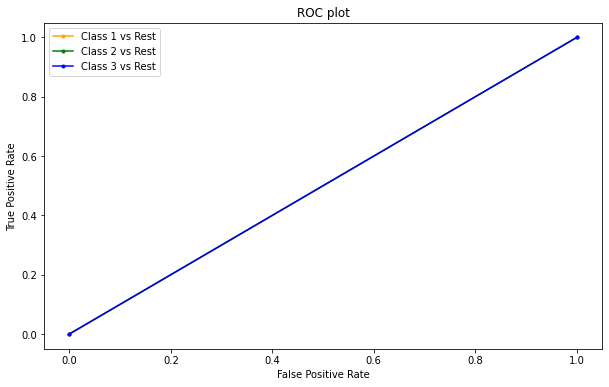

Testing Set:
Accuracy:  0.8263888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score:  0.3333333333333333
Precision Score:  0.27546296296296297


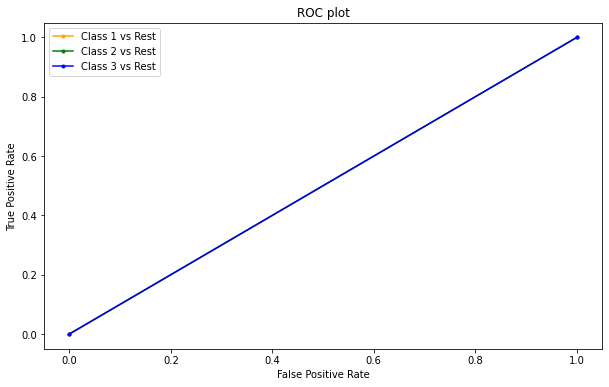

In [86]:
print("Training Set:")
TreeReport(y_train, DT_B_3.predict(x_train))

print("Testing Set:")
TreeReport(y_test,DT_B_3.predict(x_test))

## DT B 3

In [92]:
# Best performing tree
DT_B_3 = DT_B_2_CC

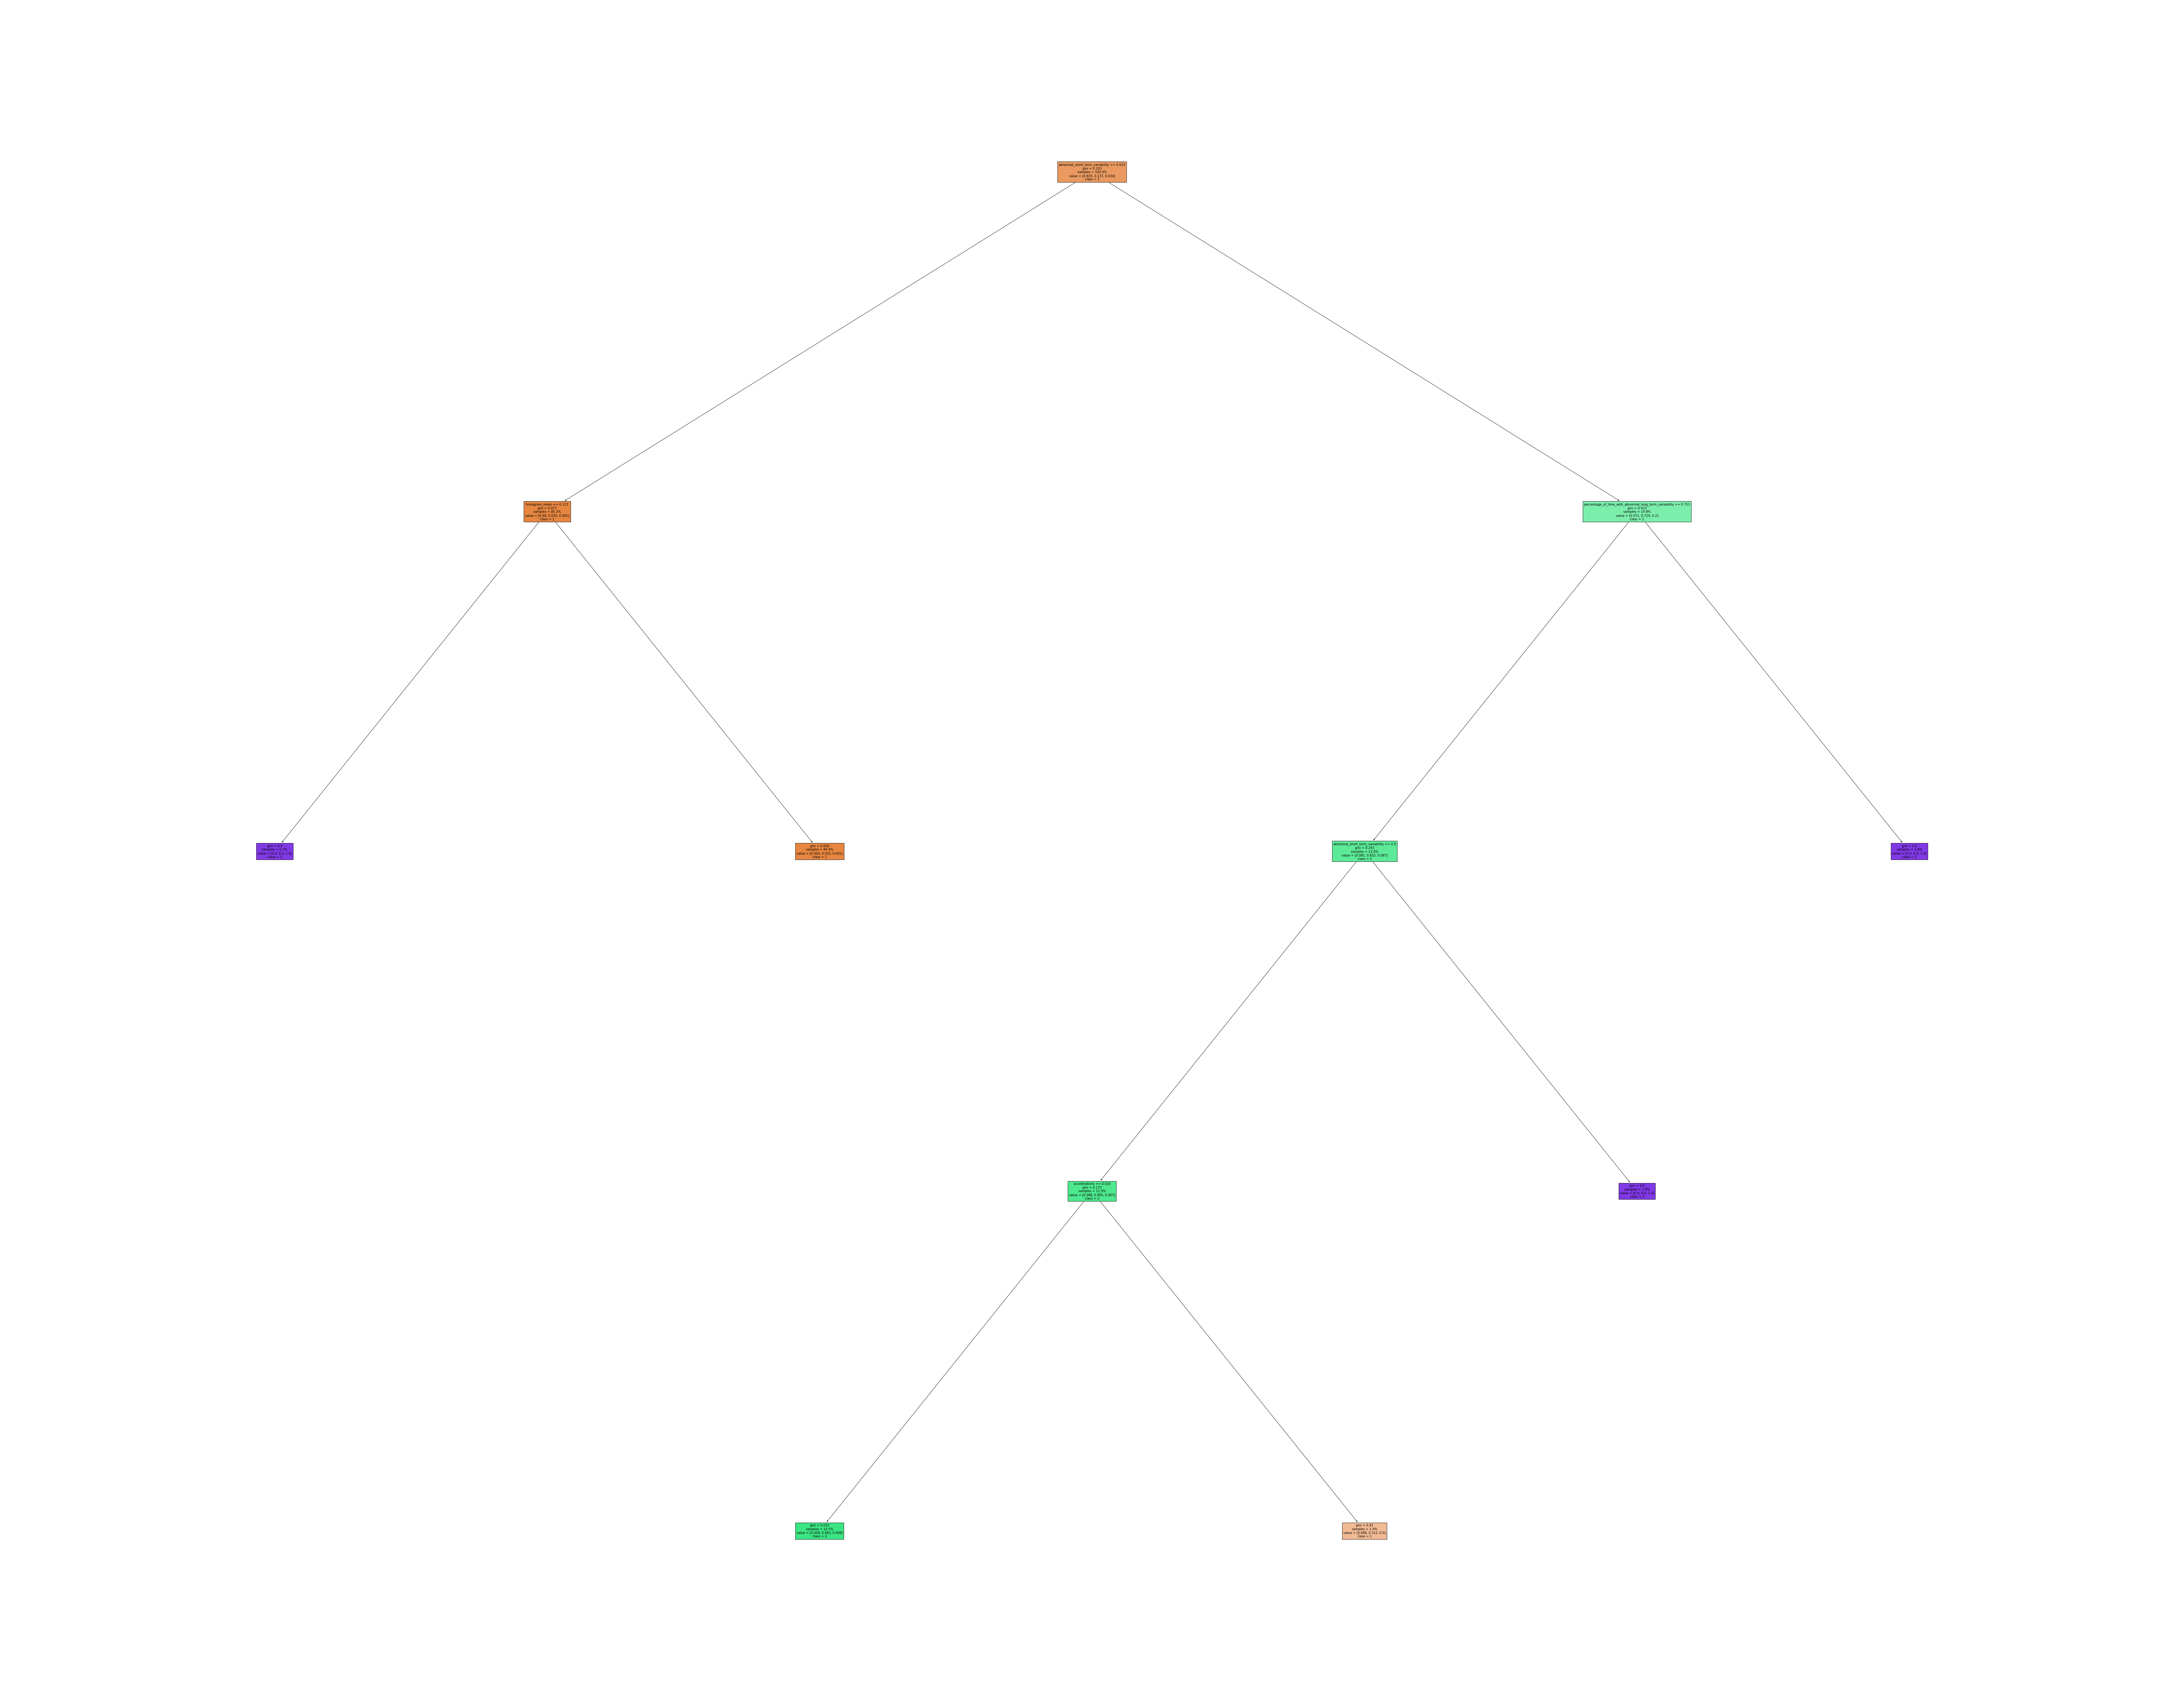

In [93]:
fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(DT_B_3, feature_names=x.columns, class_names=np.unique(y).astype('str'), filled=True, proportion=True, fontsize=10)
plt.savefig('DT_B_3.pdf',dpi=300)

In [94]:
# Saving the visualisation
from google.colab import files
files.download("/content/DT_B_3.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Ques C

## Pre-processing

In [55]:
# Data Loading
data2= pd.read_csv ('/content/drive/MyDrive/Assn1_Data/data_2.csv')
data2.describe()

baseline value  accelerations  ...  histogram_tendency  fetal_health
count      676.000000     676.000000  ...          676.000000    676.000000
mean       132.974852       0.002914  ...            0.236686      1.513314
std          8.616313       0.003946  ...            0.651073      0.789637
min        106.000000       0.000000  ...           -1.000000      1.000000
25%        129.000000       0.000000  ...            0.000000      1.000000
50%        134.000000       0.000000  ...            0.000000      1.000000
75%        138.000000       0.005000  ...            1.000000      2.000000
max        160.000000       0.017000  ...            1.000000      3.000000

[8 rows x 22 columns]

In [56]:
# Remove duplicates
data2=data2.drop_duplicates()

In [57]:
# features-class label split
x2=data2.drop(columns=['fetal_health'])
y2=data2['fetal_health']

In [58]:
# normalise
for column in list(x2):
  x2[column] = (x2[column] - x2[column].min()) / (x2[column].max() - x2[column].min())

In [59]:
# train-test split
x_train1,x_test1,y_train1,y_test1 = x_train,x_test,y_train,y_test
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=20, stratify=y2)

## Q2

In [95]:
# Deep copying DT_A
DT_C_2 = clone(DT_B_3)
DT_C_2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004384057971014493, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=20, splitter='best')

### Decision Boundary

In [96]:
def drawBoundary(i,j):
  '''
  draws decision boundary for features i and j of the original data
  '''

  pair = [i,j]
  X = x_train1.iloc[:,pair]
  y = y_train1

  DT_C_2.fit(X, y)

  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  Z = DT_C_2.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  X=X.to_numpy()
 
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(x_train1.columns[i])
  plt.ylabel(x_train1.columns[j])

  for i, color in zip(range(1,4), "ryb"):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', label=i, s=15)
      
  plt.legend()
  plt.show()

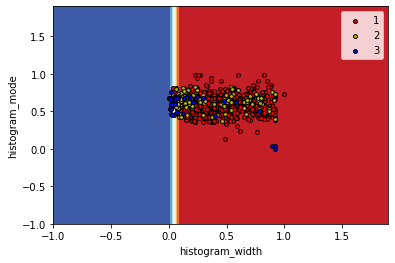

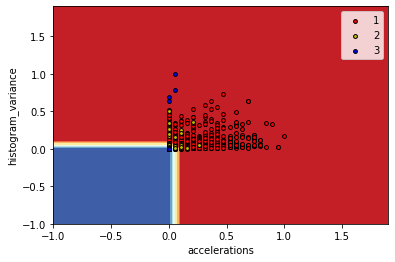

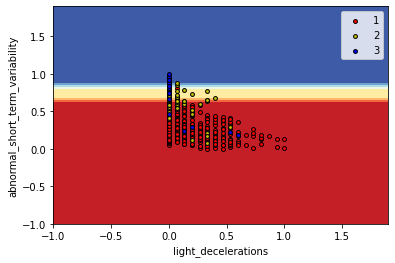

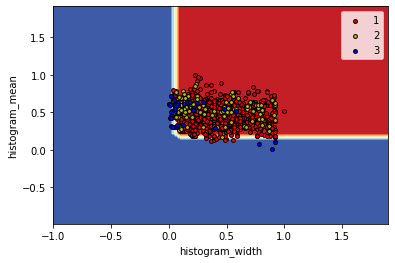

In [98]:
# Decision boundary for 4 feature pairs
features = [(11, 16), (1,19), (4, 7) , (11, 17)]
for i, j in features:
    drawBoundary(i, j)

### Nearest Decision Boundary Distance

In [99]:
pair = [4,7]
X = x_train1.iloc[:,pair]
y = y_train1
DT_C_2.fit(X, y)
# Initialise tree attributes
n_nodes = DT_C_2.tree_.node_count
children_left = DT_C_2.tree_.children_left
children_right = DT_C_2.tree_.children_right
value = DT_C_2.tree_.value
feature = DT_C_2.tree_.feature
threshold = DT_C_2.tree_.threshold

In [100]:
def nearestDiffNeighbor(sample, actual_label, node_id):
  '''
  sample: sample features
  actual_lable: actual label corresponding to the sample
  node_id: index of the current tree node
  '''
  
  predict_label = (value[node_id][0].tolist().index((max(value[node_id][0])))) + 1

  # reaches the leaf node
  if children_right[node_id] == TREE_LEAF:
    return [sample] if predict_label != actual_label else []

  diffNeighbors = []
  # if sample goes to leaf child node
  if sample[feature[node_id]] <= threshold[node_id]:
    #original branch
    diffNeighbors = diffNeighbors + nearestDiffNeighbor(sample, actual_label, children_left[node_id])

    #diff branch
    new_sample = sample.copy(deep=True)
    new_sample[feature[node_id]] = threshold[node_id] + 1e-5
    diffNeighbors = diffNeighbors + nearestDiffNeighbor(new_sample, actual_label, children_right[node_id])


  # if sample goes to right child node
  else:
    #original branch
    diffNeighbors = diffNeighbors + nearestDiffNeighbor(sample, actual_label, children_right[node_id])

    #diff branch
    new_sample = sample.copy(deep=True)
    new_sample[feature[node_id]] = threshold[node_id]
    diffNeighbors = diffNeighbors + nearestDiffNeighbor(new_sample, actual_label, children_left[node_id])

  return diffNeighbors

In [101]:
# Picking a random sample
random.seed(20)
sample_index = random.randint(0, len(x_train1))
random_sample = X.iloc[sample_index]
random_sample_label = y.iloc[sample_index]
random_sample

light_decelerations                0.000000
abnormal_short_term_variability    0.866667
Name: 1280, dtype: float32

In [102]:
print(DT_C_2.predict(np.c_[random_sample[0], random_sample[1]]))

[2]


In [103]:
neighbors = nearestDiffNeighbor(random_sample, random_sample_label, 0)
for neighbor in neighbors:
  print(DT_C_2.predict(np.c_[neighbor[0], neighbor[1]]))

[3]
[1]


In [104]:
distances = []
for neighbor in neighbors:
  curr_dist = ((random_sample[0] - neighbor[0]) ** 2 +
               (random_sample[1] - neighbor[1]) ** 2) ** 0.5
  distances.append(curr_dist)

min_dist = min(distances)
print("Euclidean Distance:", min_dist)  

Euclidean Distance: 0.020009994506835938
